In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("market_analysis_07_06.csv")

In [11]:
df.head(10)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Kochi
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Chennai
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Mumbai
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Mumbai
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Mumbai
5,6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",Bangalore
6,7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Kolkata
7,8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Hyderabad
8,9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",Bangalore
9,10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Chennai


In [4]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = pd.to_numeric(df["Month"])

In [5]:
month_results = df.groupby("Month").sum()["Amount"]
month_results

Month
1     131911323.0
2     159402062.0
3     203203027.0
4     245447126.0
5     228213951.0
6     186604505.0
7     191669704.0
8     162474699.0
9     151840144.0
10    270497713.0
11    231615827.0
12    333962263.0
Name: Amount, dtype: float64

In [6]:
month_results = month_results/10000000

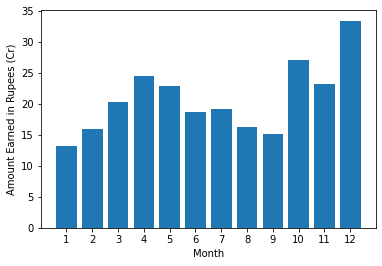

In [7]:
months = range(1, 13)
plt.bar(months, month_results)
plt.xticks(months)

plt.xlabel("Month")
plt.ylabel("Amount Earned in Rupees (Cr)")
plt.show()

In [8]:
len(df["Product"].value_counts())

19

In [9]:
cat_list = []
for i in range(len(df)):
    cat_list.append(i)

In [10]:
prod_list = df["Product"].tolist()
for i in range(len(df)):
    if prod_list[i] == "USB-C Charging Cable" or prod_list[i] == "Lightning Charging Cable":
        cat_list[i] = "Charger"
    elif prod_list[i] == "AAA Batteries (4-pack)" or prod_list[i] == "AA Batteries (4-pack)":
        cat_list[i] = "Battery"
    elif prod_list[i] == "Wired Headphones" or prod_list[i] == "Apple Airpods Headphones" or prod_list[i] == "Bose SoundSport Headphones":
        cat_list[i] = "Headphone"
    elif prod_list[i] == "27in FHD Monitor" or prod_list[i] == "27in 4K Gaming Monitor" or prod_list[i] == "34in Ultrawide Monitor" or prod_list[i] == "20in Monitor":
        cat_list[i] = "Monitor"
    elif prod_list[i] == "iPhone" or prod_list[i] == "Pixel 4A" or prod_list[i] == "Micromax Canvas 2":
        cat_list[i] = "Phone"
    elif prod_list[i] == "Flatscreen TV":
        cat_list[i] = "TV"
    elif prod_list[i] == "Macbook Pro Laptop" or prod_list[i] == "ThinkPad Laptop":
        cat_list[i] = "Laptop"
    else:
        cat_list[i] = "Misc"

In [11]:
df["Category"] = cat_list

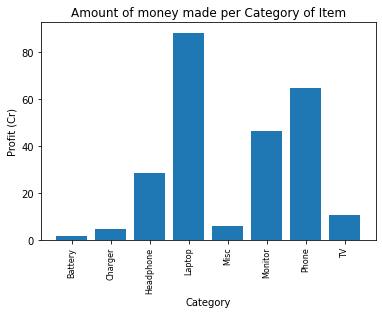

In [12]:
cats = [cat for cat , df in df.groupby('Category')]

plt.bar(cats, df.groupby('Category').sum()["Amount"]/10000000)
plt.xticks(cats, rotation = "vertical", size = 8)
plt.xlabel("Category")
plt.ylabel("Profit (Cr)")
plt.title("Amount of money made per Category of Item")
plt.show()

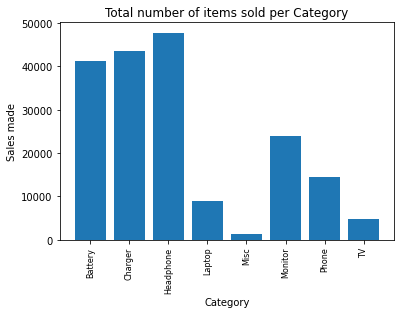

In [13]:
plt.bar(cats, df.groupby('Category').count()["Amount"])
plt.xticks(cats, rotation = "vertical", size = 8)
plt.xlabel("Category")
plt.ylabel("Sales made")
plt.title("Total number of items sold per Category")
plt.show()

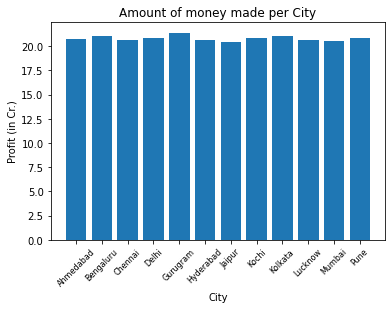

In [13]:
cities = [city for city , df in df.groupby('City')]

plt.bar(cities, df.groupby('City').sum()["Amount"]/10000000)
plt.xticks(cities, rotation = "45", size = 8)
plt.xlabel("City")
plt.ylabel("Profit (in Cr.)")
plt.title("Amount of money made per City")
plt.show()

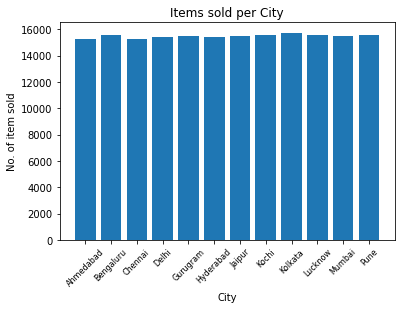

In [14]:
cities = [city for city , df in df.groupby('City')]

plt.bar(cities, df.groupby('City').count()["Amount"])
plt.xticks(cities, rotation = "45", size = 8)
plt.xlabel("City")
plt.ylabel("No. of item sold")
plt.title("Items sold per City")
plt.show()

In [15]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [16]:
df["Hour"] = df["Order Date"].dt.hour

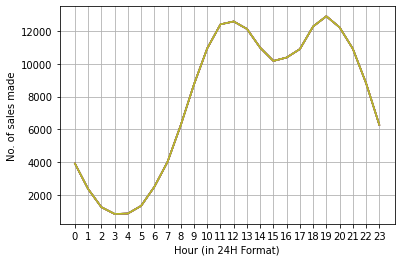

In [17]:
hours = [hour for hour, df in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())
plt.grid()
plt.xticks(hours)
plt.xlabel("Hour (in 24H Format)")
plt.ylabel("No. of sales made")
plt.show()

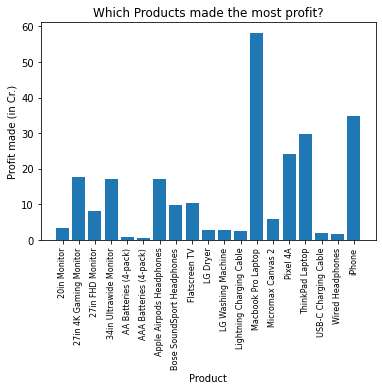

In [18]:
prods = [prod for prod , df in df.groupby('Product')]

plt.bar(prods, df.groupby('Product').sum()["Amount"]/10000000)
plt.xticks(prods, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Profit made (in Cr.)")
plt.title("Which Products made the most profit?")
plt.show()

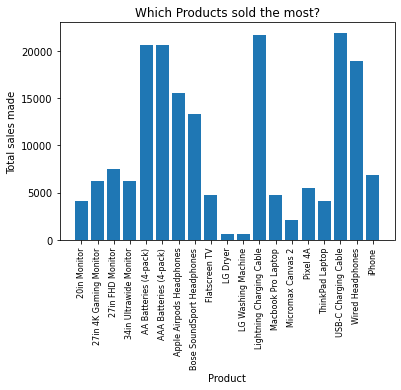

In [19]:
prods = [prod for prod , df in df.groupby('Product')]

plt.bar(prods, df.groupby('Product').count()["Amount"])
plt.xticks(prods, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Total sales made")
plt.title("Which Products sold the most?")
plt.show()

In [64]:
df_grp = df[df["Order ID"].duplicated(keep = False)]

df_grp["Grouped"] = df_grp.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))

df_grp = df_grp[["Order ID", "Grouped"]].drop_duplicates()

df_grp = df_grp.reset_index(drop = True)
df_grp.head()

<ipython-input-64-fe762e86c992>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp["Grouped"] = df_grp.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,176560,"Pixel 4A,Wired Headphones"
1,176574,"Pixel 4A,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Pixel 4A"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

In [21]:
count = Counter()

for row in df_grp["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Pixel 4A', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Pixel 4A', 'Wired Headphones'), 414),
 (('Micromax Canvas 2', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Pixel 4A', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Micromax Canvas 2', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [22]:
count = Counter()

for row in df_grp["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
count.most_common(10)

[(('Pixel 4A', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Pixel 4A', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Micromax Canvas 2', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Pixel 4A', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Micromax Canvas 2', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Micromax Canvas 2', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

In [28]:
df1 = pd.read_csv("market_analysis_07_06.csv")
cit = df1["City"].tolist()
df["City"] = cit